In [1]:
import scipy.io as scipy
import numpy as np
import matplotlib.pyplot as plt
import librosa
from sklearn import preprocessing
import tensorflow as tf
import os
import librosa.display

In [2]:
a = '/content/drive/MyDrive/Skeleton/a'
b = '_s'
c = '_t'
d = '_skeleton.mat'
file_list_skeleton = []
for i in range(10,20):
  for j in range(1,9):
    for k in range(1,5):
      file_path = a + str(i)+b+str(j)+c+str(k)+d
      file_list_skeleton.append(file_path)
for i in range(1,2):
  for j in range(1,9):
    for k in range(1,5):
      file_path = a + str(i)+b+str(j)+c+str(k)+d
      file_list_skeleton.append(file_path)
for i in range(20,28):
  for j in range(1,9):
    for k in range(1,5):
      file_path = a + str(i)+b+str(j)+c+str(k)+d
      file_list_skeleton.append(file_path)
for i in range(2,10):
  for j in range(1,9):
    for k in range(1,5):
      file_path = a + str(i)+b+str(j)+c+str(k)+d
      file_list_skeleton.append(file_path)
file_list_skeleton.remove('/content/drive/MyDrive/Skeleton/a23_s6_t4_skeleton.mat')
file_list_skeleton.remove('/content/drive/MyDrive/Skeleton/a27_s8_t4_skeleton.mat')
file_list_skeleton.remove('/content/drive/MyDrive/Skeleton/a8_s1_t4_skeleton.mat')

In [3]:
def images_creater(file):
    data = scipy.loadmat(file)
    data = data['d_skel']
    x_images = data[0,0,:]
    y_images = data[0,0,:]
    z_images = data[0,0,:]
    for i in range(20):
        for j in range(3):
            if j == 0:
                x_images = np.vstack((x_images,data[i,j,:]))
            elif j == 1:
                y_images = np.vstack((y_images,data[i,j,:]))
            else:
                z_images = np.vstack((z_images,data[i,j,:]))
    x_images=x_images[1:,:]
    y_images=y_images[1:,:]
    z_images=z_images[1:,:]
    v_x = np.lib.stride_tricks.sliding_window_view(x_images,(20,40))
    v_y = np.lib.stride_tricks.sliding_window_view(y_images,(20,40))
    v_z = np.lib.stride_tricks.sliding_window_view(z_images,(20,40))
    v_squeeze = v_x.squeeze()
    v_x = np.expand_dims(v_squeeze,axis=-1)
    v_squeeze = v_y.squeeze()
    v_y = np.expand_dims(v_squeeze,axis=-1)
    v_squeeze = v_z.squeeze()
    v_z = np.expand_dims(v_squeeze,axis=-1)
    v_expand = np.concatenate((v_x,v_y,v_z), axis=3)

    label = file[-21:-19]
    if 'a' in label[0]:
        label = label[-1]
    label=int(label)
    if label == 27:
        label = 0
    labels = np.zeros(v_expand.shape[0],dtype = 'int32')
    for i in range(v_expand.shape[0]):
        labels[i] = label
    return v_expand,labels

In [4]:
def load_data(data_directory):
    file_names = file_list_skeleton
    path = '/content/drive/MyDrive/Skeleton/a1_s1_t1_skeleton.mat'
    images,labels = images_creater(path)
    train_datas = images
    train_labels = labels
    test_datas = images
    test_labels = labels
    train_split = [1,3,5,7]
    for d in file_names:
        images,labels = images_creater(d)
        #print(images.shape)
        if int(d[-17:-16]) in train_split:
            train_labels = np.append(train_labels,labels,axis = 0)
            train_datas = np.append(train_datas,images,axis = 0)
        else:
            test_labels = np.append(test_labels,labels,axis = 0)
            test_datas = np.append(test_datas,images,axis = 0)
    train_datas = train_datas[9:,:,:,:]    
    test_datas = test_datas[9:,:,:,:]
    test_labels = test_labels[9:]
    train_labels = train_labels[9:]
    return train_labels,train_datas,test_labels,test_datas

In [5]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data_directory = '/content/drive/MyDrive/Skeleton'

In [7]:
train_labels,train_datas,test_labels,test_datas = load_data(data_directory)

In [ ]:
print(train_labels.shape)
print(train_datas.shape)
print(test_labels.shape)
print(test_datas.shape)

(12390,)
(12390, 20, 40, 3)
(12330,)
(12330, 20, 40, 3)


In [8]:
n = 15
train_x21 = train_datas[::n, ...]
train_y21 = train_labels[::n, ...]
test_x21 = test_datas[::n, ...]
test_y21 = test_labels[::n, ...]
print(train_y21.shape)
print(train_x21.shape)
print(test_y21.shape)
print(test_x21.shape)

(826,)
(826, 20, 40, 3)
(822,)
(822, 20, 40, 3)


In [9]:
train_xnew1 = train_x21[:16]
train_ynew1 = train_y21[:16]
train_xx = np.concatenate((train_x21[:16], train_x21[37:53]))
train_yy = np.concatenate((train_y21[:16], train_y21[37:53]))
train_xx = np.concatenate((train_xx, train_x21[75:91]))
train_yy = np.concatenate((train_yy, train_y21[75:91]))
train_xx = np.concatenate((train_xx, train_x21[118:134]))
train_yy = np.concatenate((train_yy, train_y21[118:134]))
train_xx = np.concatenate((train_xx, train_x21[151:167]))
train_yy = np.concatenate((train_yy, train_y21[151:167]))
train_xx = np.concatenate((train_xx, train_x21[191:207]))
train_yy = np.concatenate((train_yy, train_y21[191:207]))
train_xx = np.concatenate((train_xx, train_x21[219:235]))
train_yy = np.concatenate((train_yy, train_y21[219:235]))
train_xx = np.concatenate((train_xx, train_x21[239:255]))
train_yy = np.concatenate((train_yy, train_y21[239:255]))
train_xx = np.concatenate((train_xx, train_x21[271:287]))
train_yy = np.concatenate((train_yy, train_y21[271:287]))
train_xx = np.concatenate((train_xx, train_x21[293:309]))
train_yy = np.concatenate((train_yy, train_y21[293:309]))
train_xx = np.concatenate((train_xx, train_x21[321:337]))
train_yy = np.concatenate((train_yy, train_y21[321:337]))
train_xx = np.concatenate((train_xx, train_x21[342:358]))
train_yy = np.concatenate((train_yy, train_y21[342:358]))
train_xx = np.concatenate((train_xx, train_x21[365:381]))
train_yy = np.concatenate((train_yy, train_y21[365:381]))
train_xx = np.concatenate((train_xx, train_x21[411:427]))
train_yy = np.concatenate((train_yy, train_y21[411:427]))
train_xx = np.concatenate((train_xx, train_x21[445:461]))
train_yy = np.concatenate((train_yy, train_y21[445:461]))
train_xx = np.concatenate((train_xx, train_x21[483:499]))
train_yy = np.concatenate((train_yy, train_y21[483:499]))
train_xx = np.concatenate((train_xx, train_x21[499:515]))
train_yy = np.concatenate((train_yy, train_y21[499:515]))
train_xx = np.concatenate((train_xx, train_x21[517:533]))
train_yy = np.concatenate((train_yy, train_y21[517:533]))
train_xx = np.concatenate((train_xx, train_x21[561:577]))
train_yy = np.concatenate((train_yy, train_y21[561:577]))
train_xx = np.concatenate((train_xx, train_x21[609:625]))
train_yy = np.concatenate((train_yy, train_y21[609:625]))
train_xx = np.concatenate((train_xx, train_x21[629:645]))
train_yy = np.concatenate((train_yy, train_y21[629:645]))
train_xx = np.concatenate((train_xx, train_x21[657:673]))
train_yy = np.concatenate((train_yy, train_y21[657:673]))
train_xx = np.concatenate((train_xx, train_x21[679:695]))
train_yy = np.concatenate((train_yy, train_y21[679:695]))
train_xx = np.concatenate((train_xx, train_x21[703:719]))
train_yy = np.concatenate((train_yy, train_y21[703:719]))
train_xx = np.concatenate((train_xx, train_x21[733:749]))
train_yy = np.concatenate((train_yy, train_y21[733:749]))
train_xx = np.concatenate((train_xx, train_x21[764:779]))
train_yy = np.concatenate((train_yy, train_y21[764:779]))
train_xx = np.concatenate((train_xx, train_x21[785:801]))
train_yy = np.concatenate((train_yy, train_y21[785:801]))
print(train_xx.shape)
print(train_yy.shape)
test_xnew1 = test_x21[:16]
test_ynew1 = test_y21[:16]
test_xx = np.concatenate((test_x21[:16], test_x21[37:53]))
test_yy = np.concatenate((test_y21[:16], test_y21[37:53]))
test_xx = np.concatenate((test_xx, test_x21[80:96]))
test_yy = np.concatenate((test_yy, test_y21[80:96]))
test_xx = np.concatenate((test_xx, test_x21[117:133]))
test_yy = np.concatenate((test_yy, test_y21[117:133]))
test_xx = np.concatenate((test_xx, test_x21[148:164]))
test_yy = np.concatenate((test_yy, test_y21[148:164]))
test_xx = np.concatenate((test_xx, test_x21[183:199]))
test_yy = np.concatenate((test_yy, test_y21[183:199]))
test_xx = np.concatenate((test_xx, test_x21[208:224]))
test_yy = np.concatenate((test_yy, test_y21[208:224]))
test_xx = np.concatenate((test_xx, test_x21[231:247]))
test_yy = np.concatenate((test_yy, test_y21[231:247]))
test_xx = np.concatenate((test_xx, test_x21[261:277]))
test_yy = np.concatenate((test_yy, test_y21[261:277]))
test_xx = np.concatenate((test_xx, test_x21[288:304]))
test_yy = np.concatenate((test_yy, test_y21[288:304]))
test_xx = np.concatenate((test_xx, test_x21[321:337]))
test_yy = np.concatenate((test_yy, test_y21[321:337]))
test_xx = np.concatenate((test_xx, test_x21[348:364]))
test_yy = np.concatenate((test_yy, test_y21[348:364]))
test_xx = np.concatenate((test_xx, test_x21[367:383]))
test_yy = np.concatenate((test_yy, test_y21[367:383]))
test_xx = np.concatenate((test_xx, test_x21[424:440]))
test_yy = np.concatenate((test_yy, test_y21[424:440]))
test_xx = np.concatenate((test_xx, test_x21[450:465]))
test_yy = np.concatenate((test_yy, test_y21[450:465]))
test_xx = np.concatenate((test_xx, test_x21[488:504]))
test_yy = np.concatenate((test_yy, test_y21[488:504]))
test_xx = np.concatenate((test_xx, test_x21[507:523]))
test_yy = np.concatenate((test_yy, test_y21[507:523]))
test_xx = np.concatenate((test_xx, test_x21[528:544]))
test_yy = np.concatenate((test_yy, test_y21[528:544]))
test_xx = np.concatenate((test_xx, test_x21[571:586]))
test_yy = np.concatenate((test_yy, test_y21[571:586]))
test_xx = np.concatenate((test_xx, test_x21[613:629]))
test_yy = np.concatenate((test_yy, test_y21[613:629]))
test_xx = np.concatenate((test_xx, test_x21[637:653]))
test_yy = np.concatenate((test_yy, test_y21[637:653]))
test_xx = np.concatenate((test_xx, test_x21[666:682]))
test_yy = np.concatenate((test_yy, test_y21[666:682]))
test_xx = np.concatenate((test_xx, test_x21[692:708]))
test_yy = np.concatenate((test_yy, test_y21[692:708]))
test_xx = np.concatenate((test_xx, test_x21[711:727]))
test_yy = np.concatenate((test_yy, test_y21[711:727]))
test_xx = np.concatenate((test_xx, test_x21[734:750]))
test_yy = np.concatenate((test_yy, test_y21[734:750]))
test_xx = np.concatenate((test_xx, test_x21[751:767]))
test_yy = np.concatenate((test_yy, test_y21[751:767]))
test_xx = np.concatenate((test_xx, test_x21[783:799]))
test_yy = np.concatenate((test_yy, test_y21[783:799]))
print(test_xx.shape)
print(test_yy.shape)

(431, 20, 40, 3)
(431,)
(430, 20, 40, 3)
(430,)


In [10]:
train_datas = train_xx
train_labels = train_yy
test_datas = test_xx
test_labels = test_yy

In [11]:
max1 = np.max(train_datas)
min1 = np.min(train_datas)
a = (train_datas - min1)/ (max1-min1)
train_datas = (a-0.5)*2
print(np.max(train_datas))
print(np.min(train_datas))
b = (test_datas - min1)/ (max1-min1)
test_datas = (b-0.5)*2
print(np.max(test_datas))
print(np.min(test_datas))

1.0
-1.0
0.9490938153789554
-0.9785974439843862


In [12]:
train_arr = np.arange(train_datas.shape[0])
test_arr = np.arange(test_datas.shape[0])
np.random.seed(822)
np.random.shuffle(train_arr)
np.random.shuffle(test_arr)
train_datas_shuffled = train_datas[train_arr]
train_labels_shuffled = train_labels[train_arr]
test_datas_shuffled = test_datas[test_arr]
test_labels_shuffled = test_labels[test_arr]
print(train_datas_shuffled.shape)

(431, 20, 40, 3)


In [13]:
train_datas = tf.image.resize(train_datas_shuffled,[224,224])
train_labels = train_labels_shuffled

In [14]:
# ignore
test_datas = tf.image.resize(test_datas_shuffled,[224,224])
test_labels = test_labels_shuffled

In [ ]:
# ignore
print(train_datas.shape)
print(train_labels.shape)
print(test_datas.shape)
print(test_labels.shape)

(431, 224, 224, 3)
(431,)
(430, 224, 224, 3)
(430,)


In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_datas, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_datas, test_labels))
#valid_dataset = tf.data.Dataset.from_tensor_slices((valid_datas, valid_labels))
AUTOTUNE = tf.data.AUTOTUNE
buffer_size = train_datas.shape[0]
batch_size = 8
train_dataset = train_dataset.shuffle(buffer_size=buffer_size)\
                    .batch(batch_size,drop_remainder=True).prefetch(AUTOTUNE)

test_dataset = test_dataset.batch(batch_size,drop_remainder=True).prefetch(AUTOTUNE)

**Train**

In [ ]:
!pip install -U tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.5 MB/s eta 0:00:00


In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import scipy.io
import shutil

In [18]:
def mlp(x, hidden_units, l1=0.0001, l2=0.0001):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu, kernel_regularizer=keras.regularizers.l1_l2(l1=l1, l2=l2))(x)
    return x

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def get_config(self):
        config = super().get_config().copy()
        config.update({"patch_size": self.patch_size})
        return config

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        return tf.reshape(patches, [batch_size, -1, patches.shape[-1]])

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def get_config(self):
        config = super().get_config().copy()
        config.update({"num_patches": self.num_patches, "projection_dim": self.projection.units})
        return config

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

def create_vit_classifier(
    input_shape,
    patch_size,
    num_patches,
    projection_dim,
    num_heads,
    transformer_units,
    transformer_layers,
    mlp_head_units,
    num_classes,
    l1=0.0001,
    l2=0.0001
):
    inputs = layers.Input(shape=input_shape)
    # Create patches
    patches = Patches(patch_size)(inputs)
    # Encode patches
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP
        x3 = mlp(x3, hidden_units=transformer_units, l1=l1, l2=l2)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.3)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, l1=l1, l2=l2)

    # Classification head
    outputs = layers.Dense(num_classes, activation="softmax")(features)

    # return Keras model
    return keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
def run_experiment(model, learning_rate, weight_decay, batch_size, num_epochs):
#    optimizer = tfa.optimizers.AdamW(
#        learning_rate=learning_rate, weight_decay=weight_decay    )
    sgd = tf.keras.optimizers.legacy.SGD(learning_rate=0.001,decay=1e-6,momentum=0.9,nesterov=True)
    optimizer = sgd

    # Compile model.
    model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
    checkpoint_filepath = '/content/drive/MyDrive/transformer_HAR/skeleton_transformer_checkpoint/skeleton_transformer.h5'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True)  
    model.load_weights('/content/drive/MyDrive/transformer_HAR/skeleton_transformer_checkpoint/skeleton_transformer.h5')
    history = model.fit(train_dataset, validation_data = test_dataset,epochs = 100,callbacks=[model_checkpoint_callback])

    return history

image_size = 224
patch_size = 16
input_shape = (image_size, image_size, 3)  # input image shape
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 8
num_epochs = 200
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
num_classes = 27
# Size of the transformer layers
transformer_units = [
    projection_dim * 2,
    projection_dim,
]
transformer_layers = 4
mlp_head_units = [1024, 512]  # Size of the dense layers


num_patches = (image_size // patch_size) ** 2

vit_object_detector = create_vit_classifier(
    input_shape,
    patch_size,
    num_patches,
    projection_dim,
    num_heads,
    transformer_units,
    transformer_layers,
    mlp_head_units,
    num_classes = 27
)


# Train model
history = run_experiment(
    vit_object_detector, learning_rate, weight_decay, batch_size, num_epochs
)

Epoch 1/100
53/53 [==============================] - 73s 1s/step - loss: 2.3003 - accuracy: 1.0000 - val_loss: 3.6393 - val_accuracy: 0.6580
Epoch 2/100
53/53 [==============================] - 69s 1s/step - loss: 2.2823 - accuracy: 1.0000 - val_loss: 3.6417 - val_accuracy: 0.6675
Epoch 3/100
53/53 [==============================] - 67s 1s/step - loss: 2.2697 - accuracy: 1.0000 - val_loss: 3.6685 - val_accuracy: 0.6415
Epoch 4/100
53/53 [==============================] - 68s 1s/step - loss: 2.2477 - accuracy: 1.0000 - val_loss: 3.6042 - val_accuracy: 0.6462
Epoch 5/100
53/53 [==============================] - 67s 1s/step - loss: 2.2315 - accuracy: 1.0000 - val_loss: 3.5820 - val_accuracy: 0.6486
Epoch 6/100
53/53 [==============================] - 67s 1s/step - loss: 2.2134 - accuracy: 1.0000 - val_loss: 3.6060 - val_accuracy: 0.6462
Epoch 7/100
53/53 [==============================] - 67s 1s/step - loss: 2.1966 - accuracy: 1.0000 - val_loss: 3.5248 - val_accuracy: 0.6486
Epoch 8/100
5

In [ ]:
model.summary()

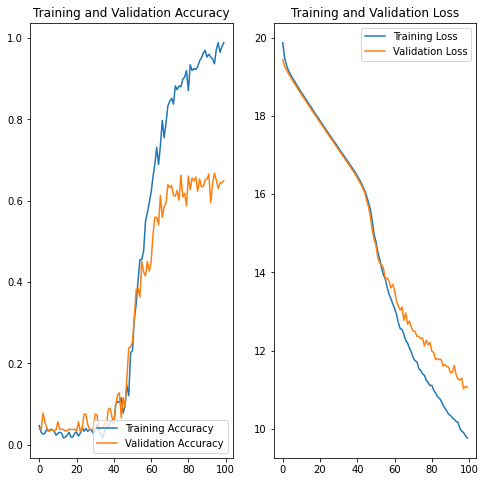

In [ ]:
epochs = 100
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
with open("/content/drive/MyDrive/transformer_HAR/skeleton_transformer_checkpoint/skeleton_result_vit.txt", "w") as file:
    for item in acc:
        file.write(str(item) + "\n")
    file.write("\n")
    for item in val_acc:
        file.write(str(item) + "\n")
    file.write("\n")
    for item in loss:
        file.write(str(item) + "\n")
    file.write("\n")
    for item in val_loss:
        file.write(str(item) + "\n")

In [19]:
image_size = 224
patch_size = 16
input_shape = (image_size, image_size, 3)  # input image shape
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 8
num_epochs = 200
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
num_classes = 27
# Size of the transformer layers
transformer_units = [
    projection_dim * 2,
    projection_dim,
]
transformer_layers = 4
mlp_head_units = [1024, 512]  # Size of the dense layers


num_patches = (image_size // patch_size) ** 2

vit_object_detector = create_vit_classifier(
    input_shape,
    patch_size,
    num_patches,
    projection_dim,
    num_heads,
    transformer_units,
    transformer_layers,
    mlp_head_units,
    num_classes = 27
)

model = vit_object_detector
sgd = tf.keras.optimizers.legacy.SGD(learning_rate=0.001,decay=1e-6,momentum=0.9,nesterov=True)
optimizer = sgd
# Train model
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
model.load_weights('/content/drive/MyDrive/transformer_HAR/skeleton_transformer_checkpoint/skeleton_transformer.h5')

In [22]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
predictions = model.predict(x=test_datas,batch_size=8,verbose=0)
rounded_predictions = np.argmax(predictions,axis=-1)

In [24]:
count = 0
true = 0
for i in range(27):
  for j in range(len(test_labels)):
    if test_labels[j] == i:
      count += 1
      if test_labels[j] - rounded_predictions[j] == 0:
        true += 1
  acc = true / count
  print(acc)
  count = 0
  true = 0

0.8666666666666667
0.8
0.6875
0.6
0.23529411764705882
0.7333333333333333
0.75
0.8823529411764706
0.5
0.21428571428571427
0.2222222222222222
0.6666666666666666
0.75
0.875
0.8235294117647058
0.875
0.5625
0.9333333333333333
0.6875
0.4117647058823529
0.29411764705882354
0.8666666666666667
0.75
1.0
0.9375
0.8666666666666667
1.0
